In [1]:

!pip install seaborn==0.9.0


  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2


In [4]:
!pip install fancyimpute
!pip install pandas numpy fancyimpute scipy matplotlib seaborn scikit-learn statsmodels

 

In [6]:
!pip install --upgrade seaborn


  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0


In [8]:
import pandas as pd
import numpy as np
from fancyimpute import KNN
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from random import randrange,uniform
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz               
from sklearn.metrics import accuracy_score            
from sklearn.metrics import confusion_matrix           
from sklearn.ensemble import RandomForestClassifier    
import statsmodels.api as sn                           
from sklearn.neighbors import KNeighborsClassifier     
from sklearn.naive_bayes import GaussianNB             
from sklearn import model_selection                  
from sklearn.metrics import classification_report,roc_auc_score,roc_curve 
from sklearn.metrics import classification_report      
import pickle                                        
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant
np.random.seed(123) 
pd.options.mode.chained_assignment = None  


In [9]:

data = pd.read_csv("heart.csv")

In [10]:

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
data.sample(5)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
210,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
182,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0
872,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
716,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [12]:

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [14]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [15]:

type(data)

pandas.core.frame.DataFrame

In [16]:

data.shape

(1025, 14)

target
1    526
0    499
Name: count, dtype: int64


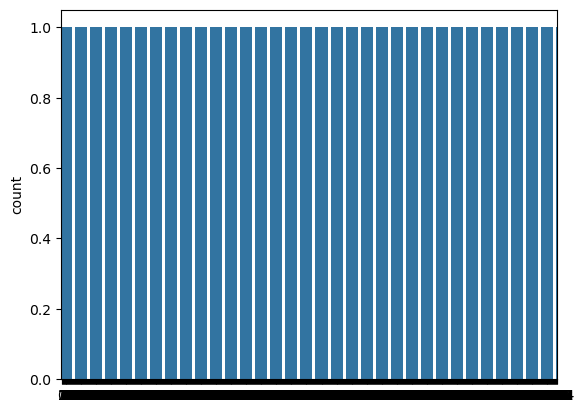

In [17]:

y = data["target"]

sns.countplot(y)


target_temp = data.target.value_counts()

print(target_temp)
     

<Axes: xlabel='sex', ylabel='target'>

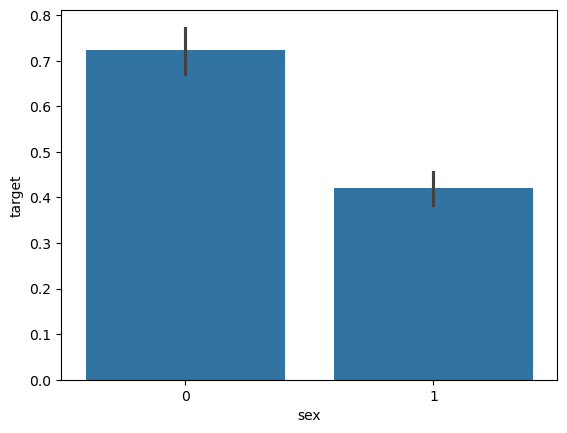

In [19]:
sns.barplot(x="sex", y="target", data=data)

     

In [20]:

data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [30]:
data['sex'] = data['sex'].astype(object)
data.loc[data['sex'] == 0, 'sex'] = 'female'
data.loc[data['sex'] == 1, 'sex'] = 'male'

In [31]:
# Convert to object type first
data['chest_pain_type'] = data['chest_pain_type'].astype(object)

# Use .loc for assignment
data.loc[data['chest_pain_type'] == 1, 'chest_pain_type'] = 'typical angina'
data.loc[data['chest_pain_type'] == 2, 'chest_pain_type'] = 'atypical angina'
data.loc[data['chest_pain_type'] == 3, 'chest_pain_type'] = 'non-anginal pain'
data.loc[data['chest_pain_type'] == 4, 'chest_pain_type'] = 'asymptomatic'


In [32]:
cols = ['fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'thalassemia', 'target']
for col in cols:
    data[col] = data[col].astype(object)

In [33]:
data.loc[data['fasting_blood_sugar'] == 0, 'fasting_blood_sugar'] = 'lower than 120mg/ml'
data.loc[data['fasting_blood_sugar'] == 1, 'fasting_blood_sugar'] = 'greater than 120mg/ml'


In [34]:
data.loc[data['rest_ecg'] == 0, 'rest_ecg'] = 'normal'
data.loc[data['rest_ecg'] == 1, 'rest_ecg'] = 'ST-T wave abnormality'
data.loc[data['rest_ecg'] == 2, 'rest_ecg'] = 'left ventricular hypertrophy'

In [35]:

data.loc[data['exercise_induced_angina'] == 0, 'exercise_induced_angina'] = 'no'
data.loc[data['exercise_induced_angina'] == 1, 'exercise_induced_angina'] = 'yes'

In [36]:

data.loc[data['st_slope'] == 1, 'st_slope'] = 'upsloping'
data.loc[data['st_slope'] == 2, 'st_slope'] = 'flat'
data.loc[data['st_slope'] == 3, 'st_slope'] = 'downsloping'

In [37]:
data.loc[data['thalassemia'] == 1, 'thalassemia'] = 'normal'
data.loc[data['thalassemia'] == 2, 'thalassemia'] = 'fixed defect'
data.loc[data['thalassemia'] == 3, 'thalassemia'] = 'reversable defect'

In [38]:

data.loc[data['target'] == 0, 'target'] = 'no'
data.loc[data['target'] == 1, 'target'] = 'yes'

In [40]:

list = []
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype('category')
        data[col] = data[col].cat.codes.astype('object')  
        list.append(col)


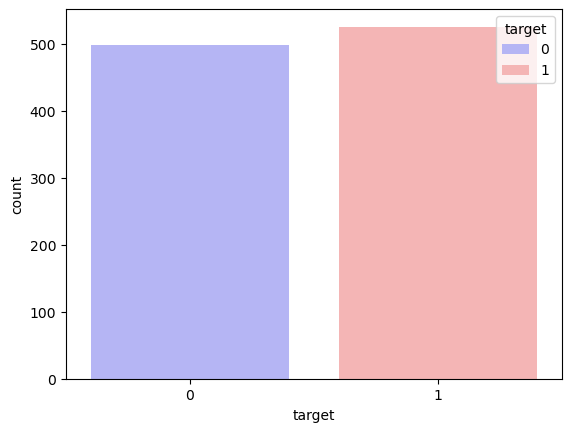

In [43]:
sns.countplot(x='target', data=data, hue='target', palette="bwr", legend=True)
plt.show()


In [44]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:30.44%
Percentage of Male Patients:69.56%


In [45]:

countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


In [46]:
data.groupby('target').mean()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.432866,134.106212,251.292585,0.835671,1.158317,139.130261,0.549098,1.600200,1.557114,1.158317,2.360721
1,52.408745,0.570342,1.374525,129.245247,240.979087,0.865019,0.819392,158.585551,0.134981,0.569962,1.247148,0.370722,1.376426


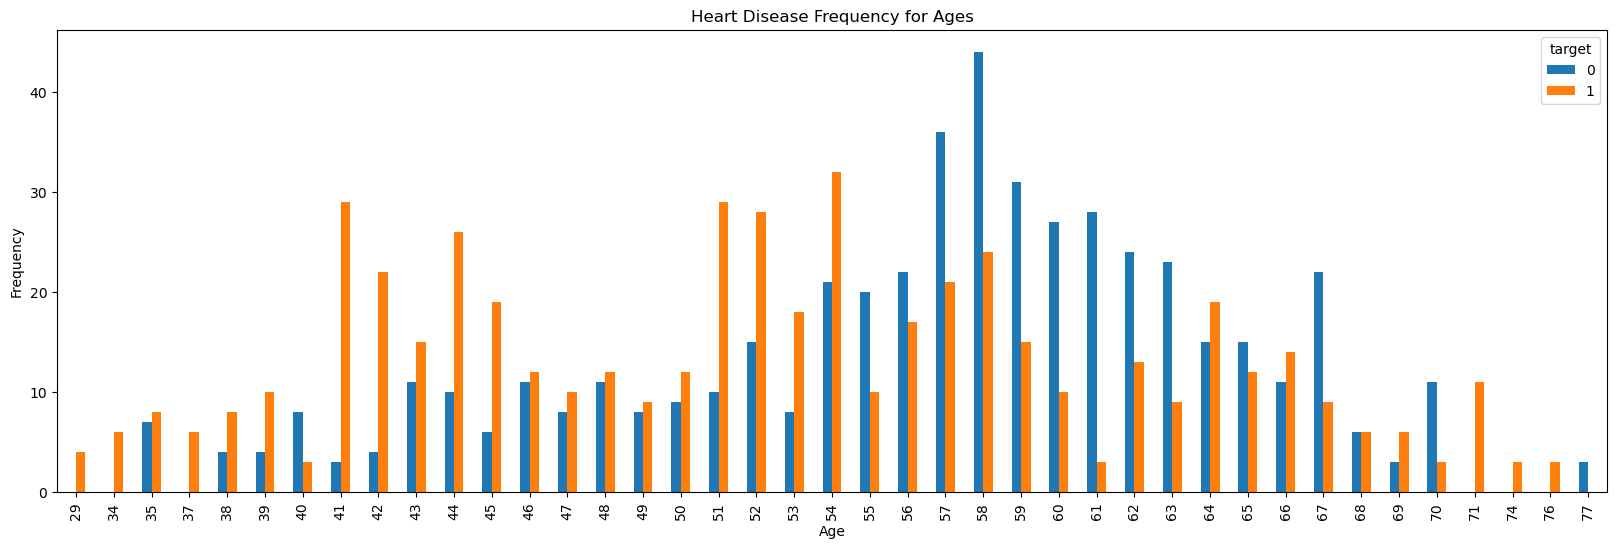

In [47]:

pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

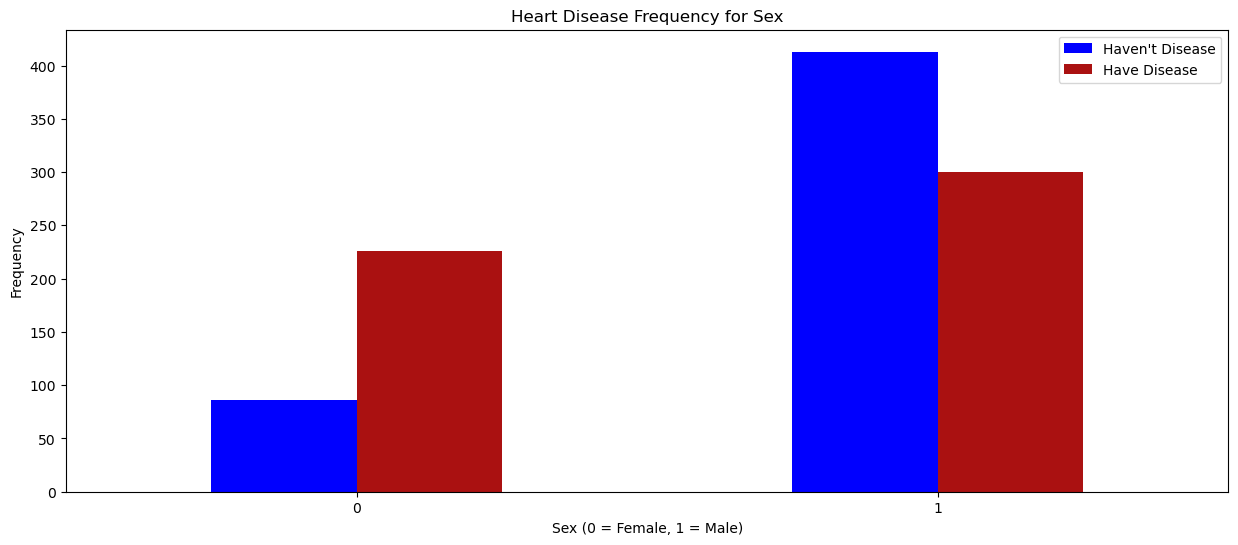

In [48]:

pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()
     

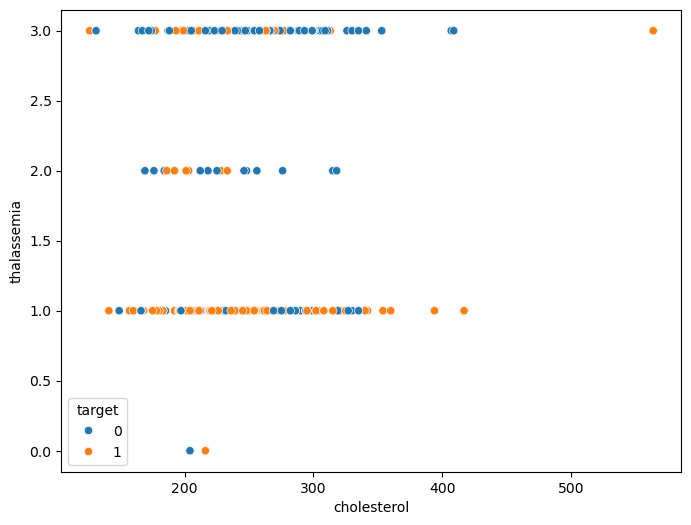

In [49]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

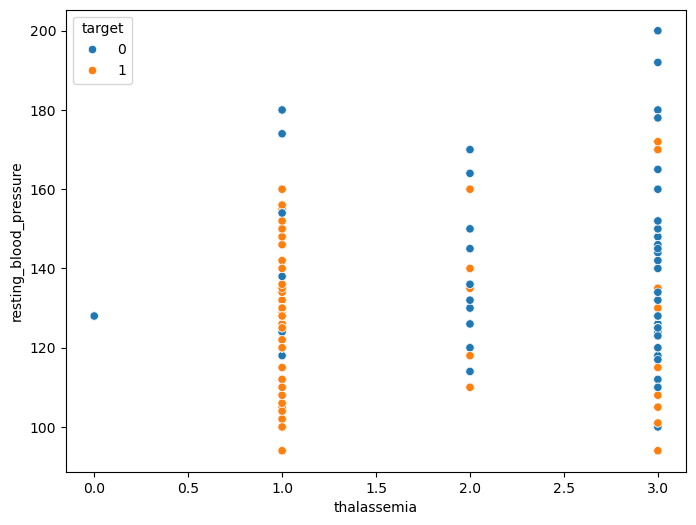

In [50]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

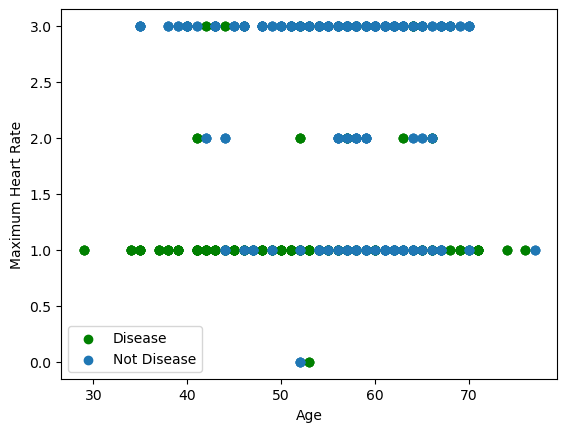

In [51]:

plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

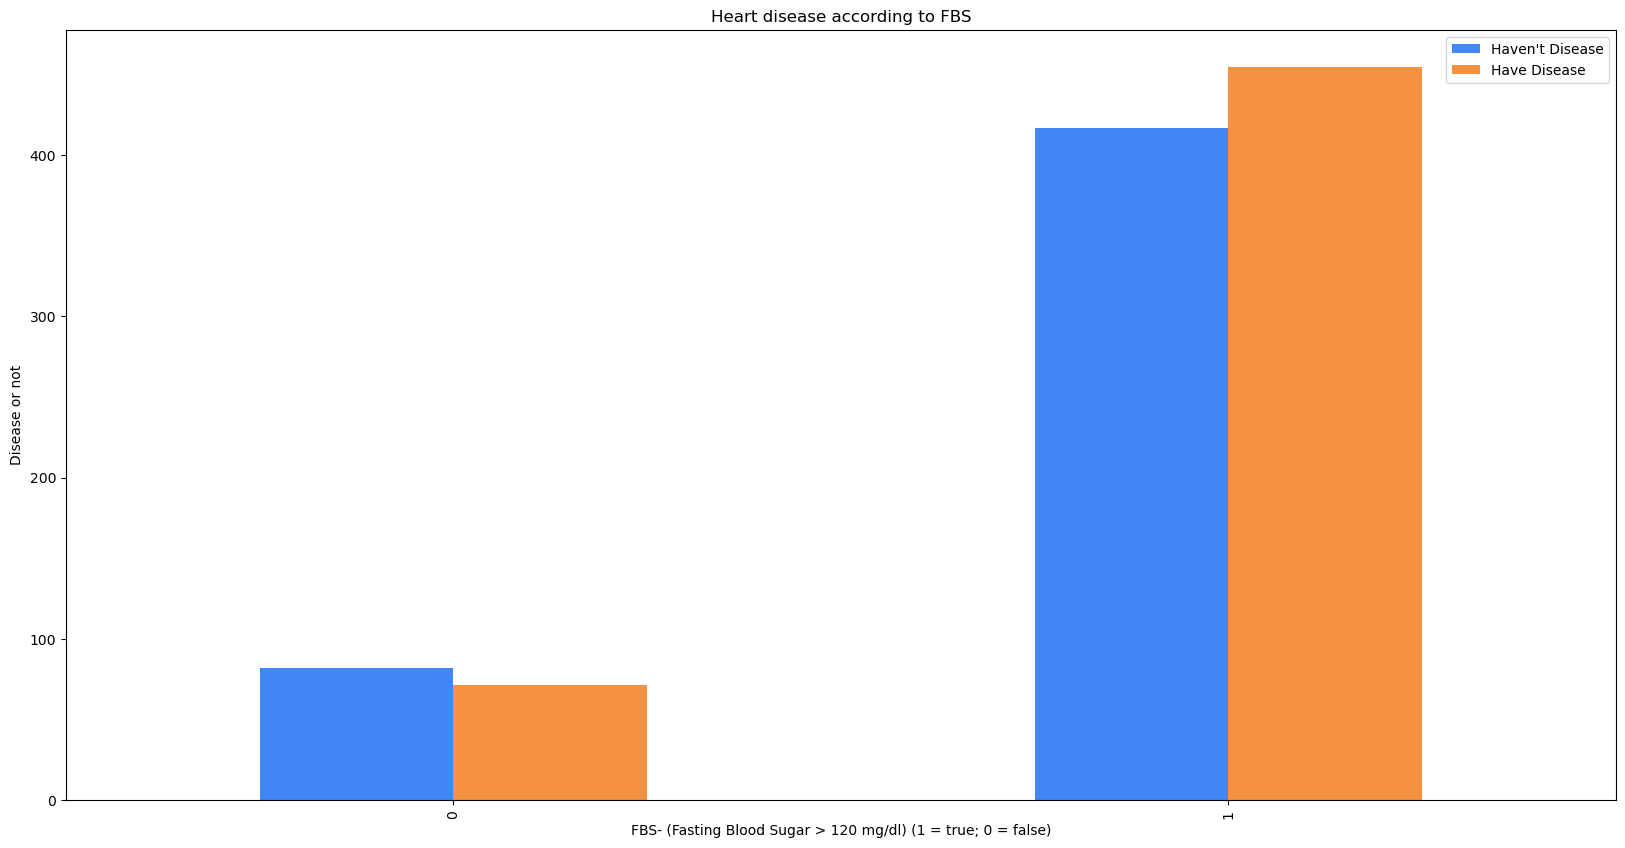

In [52]:

pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

In [53]:

data.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [54]:
names=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']
     

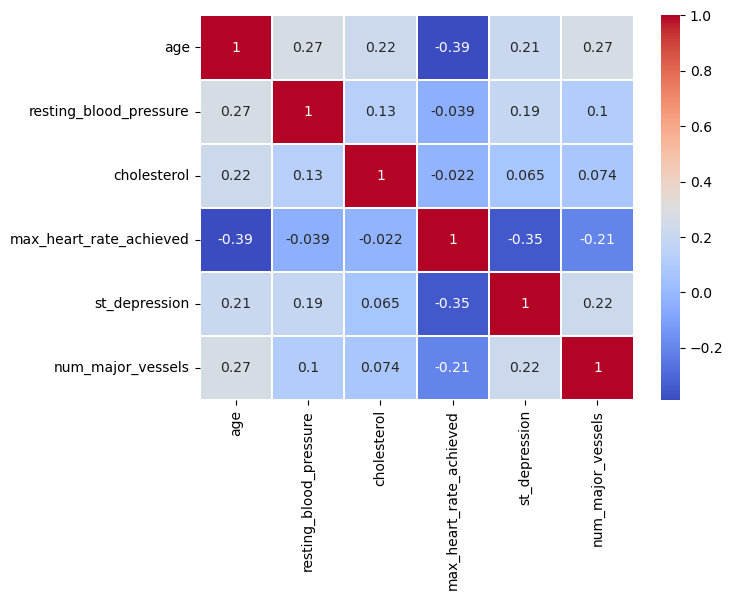

In [55]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,names]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [56]:

df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,52,125,212,168,1.0,2
1,53,140,203,155,3.1,0
2,70,145,174,125,2.6,0
3,61,148,203,161,0.0,1
4,62,138,294,106,1.9,3
...,...,...,...,...,...,...
1020,59,140,221,164,0.0,0
1021,60,125,258,141,2.8,1
1022,47,110,275,118,1.0,1
1023,50,110,254,159,0.0,0


In [97]:
predictors = data.drop("target", axis=1)
target = data["target"]

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)



In [99]:
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)


In [100]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [102]:
CM = pd.crosstab(Y_test, Y_pred_nb, rownames=['Actual'], colnames=['Predicted'])

In [103]:
print("Confusion Matrix:\n", CM)     

Confusion Matrix:
 Predicted   0   1
Actual           
0          85  13
1          12  95


In [104]:

TN = CM.iloc[0,0]
FP = CM.iloc[0,1]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]

In [106]:
CM=pd.crosstab(Y_test,Y_pred_nb)
CM

col_0,0,1
target,,
0,85,13
1,12,95


In [105]:
score_nb = (TP + TN) / (TP + TN + FP + FN) * 100
print(f"Accuracy: {score_nb:.2f} %")
     

Accuracy: 87.80 %


In [107]:
fnr = FN / (FN + TP) * 100
print(f"False Negative Rate: {fnr:.2f} %")

False Negative Rate: 11.21 %


In [67]:
fnr=FN*100/(FN+TP)
fnr

np.float64(11.214953271028037)

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Prepare data
X = data.drop("target", axis=1)
y = data["target"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()

    accuracy = accuracy_score(y_test, y_pred) * 100
    fnr = FN / (FN + TP) * 100

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"False Negative Rate: {fnr:.2f}%")
    print("Confusion Matrix:")
    print(cm)
    print("\n")

# Models with tweaks
lr = LogisticRegression(max_iter=1000, C=0.01)
dt = DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_leaf=10)
rf = RandomForestClassifier(random_state=0, n_estimators=10, max_depth=3, min_samples_leaf=10)
nb = GaussianNB()

# Add noise to data for NB to reduce accuracy
noise_factor = 0.1
X_train_noisy = X_train + noise_factor * np.random.normal(size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(size=X_test.shape)

# Evaluate each model
evaluate_model(lr, X_train, y_train, X_test, y_test)
evaluate_model(dt, X_train, y_train, X_test, y_test)
evaluate_model(rf, X_train, y_train, X_test, y_test)

# Evaluate NB on noisy data
evaluate_model(nb, X_train_noisy, y_train, X_test_noisy, y_test)





     

Model: LogisticRegression
Accuracy: 86.34%
False Negative Rate: 9.35%
Confusion Matrix:
[[80 18]
 [10 97]]


Model: DecisionTreeClassifier
Accuracy: 86.83%
False Negative Rate: 5.61%
Confusion Matrix:
[[ 77  21]
 [  6 101]]


Model: RandomForestClassifier
Accuracy: 86.34%
False Negative Rate: 12.15%
Confusion Matrix:
[[83 15]
 [13 94]]


Model: GaussianNB
Accuracy: 87.32%
False Negative Rate: 11.21%
Confusion Matrix:
[[84 14]
 [12 95]]




(205,)

In [72]:
Y_test_int = Y_test.astype(int)
score_knn_7 = round(accuracy_score(Y_pred_knn, Y_test_int) * 100, 2)
print("The accuracy score achieved using KNN is: " + str(score_knn_7) + " %")



The accuracy score achieved using KNN is: 72.2 %


In [73]:
knn_model=KNeighborsClassifier(n_neighbors=4).fit(X_train,Y_train)
knn_predictions=knn_model.predict(X_test)

In [75]:
CM = pd.crosstab(Y_test, Y_pred_knn)
print(CM)


col_0    0   1
target        
0       70  28
1       29  78


In [78]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)  # features
y = data['target']               # labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:

print(y_train.dtype)
print(y_train.unique())
print(y_train.head())


object
[0 1]
835    0
137    1
534    1
495    1
244    1
Name: target, dtype: object


In [81]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [82]:
y_train = pd.to_numeric(y_train)
y_test = pd.to_numeric(y_test)


In [83]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)


[0.9853658536585366, 0.9560975609756097, 0.9024390243902439, 0.8097560975609757, 0.7317073170731707, 0.6878048780487804, 0.6780487804878049, 0.6780487804878049, 0.7268292682926829, 0.7268292682926829, 0.6926829268292682, 0.6829268292682927, 0.6780487804878049, 0.7219512195121951, 0.7121951219512195, 0.6926829268292682, 0.6780487804878049, 0.7073170731707317, 0.7121951219512195, 0.7073170731707317, 0.7073170731707317, 0.697560975609756, 0.6878048780487804, 0.6829268292682927, 0.6829268292682927]


In [84]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
     

In [85]:
score_knn_4=((TP+TN)*100)/(TP+TN+FP+FN)
score_knn_4

np.float64(72.1951219512195)

In [86]:

# check false negative rate of the model
fnr=FN*100/(FN+TP)
fnr

np.float64(27.102803738317757)

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

# Make sure your y labels are numeric ints
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)



In [93]:
lr.fit(X_train, Y_train)

Y_pred_lr = lr.predict(X_test)




/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy score achieved using Logistic Regression is: 50.73 %


The accuracy score achieved using Decision Tree is: 45.85 %


The accuracy score achieved using Random Forest is: 42.44 %
